In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/real-estate-price-prediction/Real estate.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
#Reading Data from file
filename = '/kaggle/input/real-estate-price-prediction/Real estate.csv'
df_realestate = pd.read_csv(filename) 

In [4]:
#Data summary
df_realestate.shape

(414, 8)

Rows - 414
Columns - 8

In [5]:
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


No null values in dataset

In [6]:
df_realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
#Data Cleaning
#We can drop 'No' column as we have index column
#we can change column names
df_realestate.drop(['No'],inplace = True , axis=1)


In [8]:
#Rename
df_realestate.rename(columns = {
                                'X1 transaction date': 'Date',
                                'X2 house age' : 'House_age',
                                'X3 distance to the nearest MRT station' : 'MRT_distance',
                                'X4 number of convenience stores' : 'Conv_store_count',
                                'X5 latitude' : 'Latitude',
                                'X6 longitude' : 'Longitude',
                                'Y house price of unit area' : 'Price_per_unit'
}, inplace = True)

In [9]:
df_realestate.head()

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
#Date needs to be cleaned lets separate year
df_realestate['Year'] = df_realestate['Date'].astype(str).apply(lambda x: x[:4])
df_realestate['Year'].astype(int)

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: Year, Length: 414, dtype: int64

In [11]:
df_realestate.describe()

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [12]:
df_realestate.corrwith(df_realestate['Price_per_unit'])

Date                0.087491
House_age          -0.210567
MRT_distance       -0.673613
Conv_store_count    0.571005
Latitude            0.546307
Longitude           0.523287
Price_per_unit      1.000000
dtype: float64

In [13]:
df_realestate['Year'].nunique()

2

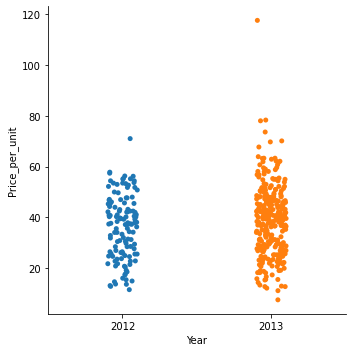

In [14]:
#we can see the distribution by price 
sns.catplot(x = 'Year' , y = 'Price_per_unit' , data =df_realestate)

There is not much difference in years.

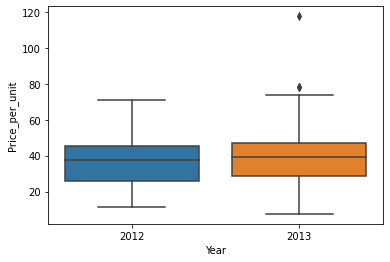

In [15]:
sns.boxplot(x = 'Year' , y = 'Price_per_unit' , data =df_realestate)

In [16]:
df_realestate.columns

Index(['Date', 'House_age', 'MRT_distance', 'Conv_store_count', 'Latitude',
       'Longitude', 'Price_per_unit', 'Year'],
      dtype='object')

In [17]:
#Modelling
X = df_realestate.drop(['Date','Year','Price_per_unit'],axis = 1)
Y = df_realestate['Price_per_unit']

In [18]:
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size =0.2 , random_state = 42)

In [19]:
LM = LinearRegression()
LM.fit(X_train,Y_train)
LM.score(X_test ,Y_test)

0.6746481382828217

In [20]:
Y_predict = LM.predict(X)

In [21]:
df_realestate['Predicted_price_per_unit'] =  LM.predict(X)

In [22]:
df_realestate.head()

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit,Year,Predicted_price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,48.388700
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,49.050798
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,46.721137
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,46.721137
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,47.872340


We used basic linear regression for training the model with using 20% as test data .Score is 0.67
Next version will try polynomial features and get a better score.

In [23]:
#Using Polynomial features
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
X_poly_train , X_poly_test ,Y_poly_train , Y_poly_test = train_test_split(X_poly,Y,test_size =0.2 , random_state = 42)
LM_poly = LinearRegression()
LM_poly.fit(X_poly_train,Y_poly_train)
LM_poly.score(X_poly_test ,Y_poly_test)

0.7505332180476724

We can see we got a better score for polynomial regression with degree 2.
Lets try for degree 2-10 and see the score values.

In [24]:
polynomial_degree1 = range(2,10)
score = []
for i in polynomial_degree1:
    X1 = df_realestate.drop(['Date','Year','Price_per_unit'],axis = 1)
    Y1 = df_realestate['Price_per_unit']
    pf1 = PolynomialFeatures(degree=i)
    X1_poly = pf1.fit_transform(X1)
    X1_poly_train , X1_poly_test ,Y1_poly_train , Y1_poly_test = train_test_split(X1_poly,Y1,test_size =0.2 , random_state = 42)
    LM1_poly = LinearRegression()
    LM1_poly.fit(X1_poly_train,Y1_poly_train)
    print(LM1_poly.score(X1_poly_test ,Y1_poly_test))

0.7505332233685725
0.4599469975199566
-0.588584927210466
-99.11975757272197
-18398.26509910515
-1253352.6569655475
-542140.6741474434
-54760385.097550124


In [25]:
Since values are going negative degree 2 polynomial is a better fit so far.

SyntaxError: invalid syntax (<ipython-input-25-adf80189ff38>, line 1)

In [26]:
df_realestate['Predicted_polynomial_price_per_unit'] =  LM_poly.predict(X_poly)
df_realestate

,Date,House_age,MRT_distance,Conv_store_count,Latitude,Longitude,Price_per_unit,Year,Predicted_price_per_unit,Predicted_polynomial_price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,48.388700,47.759914
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,49.050798,44.660524
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,46.721137,46.140576
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,46.721137,46.140576
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,47.872340,51.556292
...,...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,15.181887,20.259392
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,2012,52.291282,55.514127
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,2013,46.375426,43.020333
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,2013,45.395111,46.831952


Polynomial regression with degree two gives a better score.